In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import proplot as pplt
from matplotlib_scalebar.scalebar import ScaleBar
from skimage.restoration import unwrap_phase

from itertools import product

## inside the scan region

In [40]:
from pathlib import Path
import glob

phs = dict()
amps = dict()
for i in glob.glob('*/final_trans*.npy'):
    if i.count('padding_1'):
        padding = 1
    else:
        padding = 2

    if i.count('ePIE'):
        alg = 'GEM ePIE'
    elif i.count('PtyPy_EPIE'):
        alg = 'PtyPy EPIE'
    else:
        alg = 'PtyPy DM'

    if i.count('NoInitDefocus'):
        init = 'NoInitDefocus'
    else:
        init = 'InitDefocus'

    phs['{} {} {}'.format(alg, padding, init)] = np.load(Path(i).parent/'corrected_phase.npy')
    amps['{} {} {}'.format(alg, padding, init)] = np.abs(np.load(i))


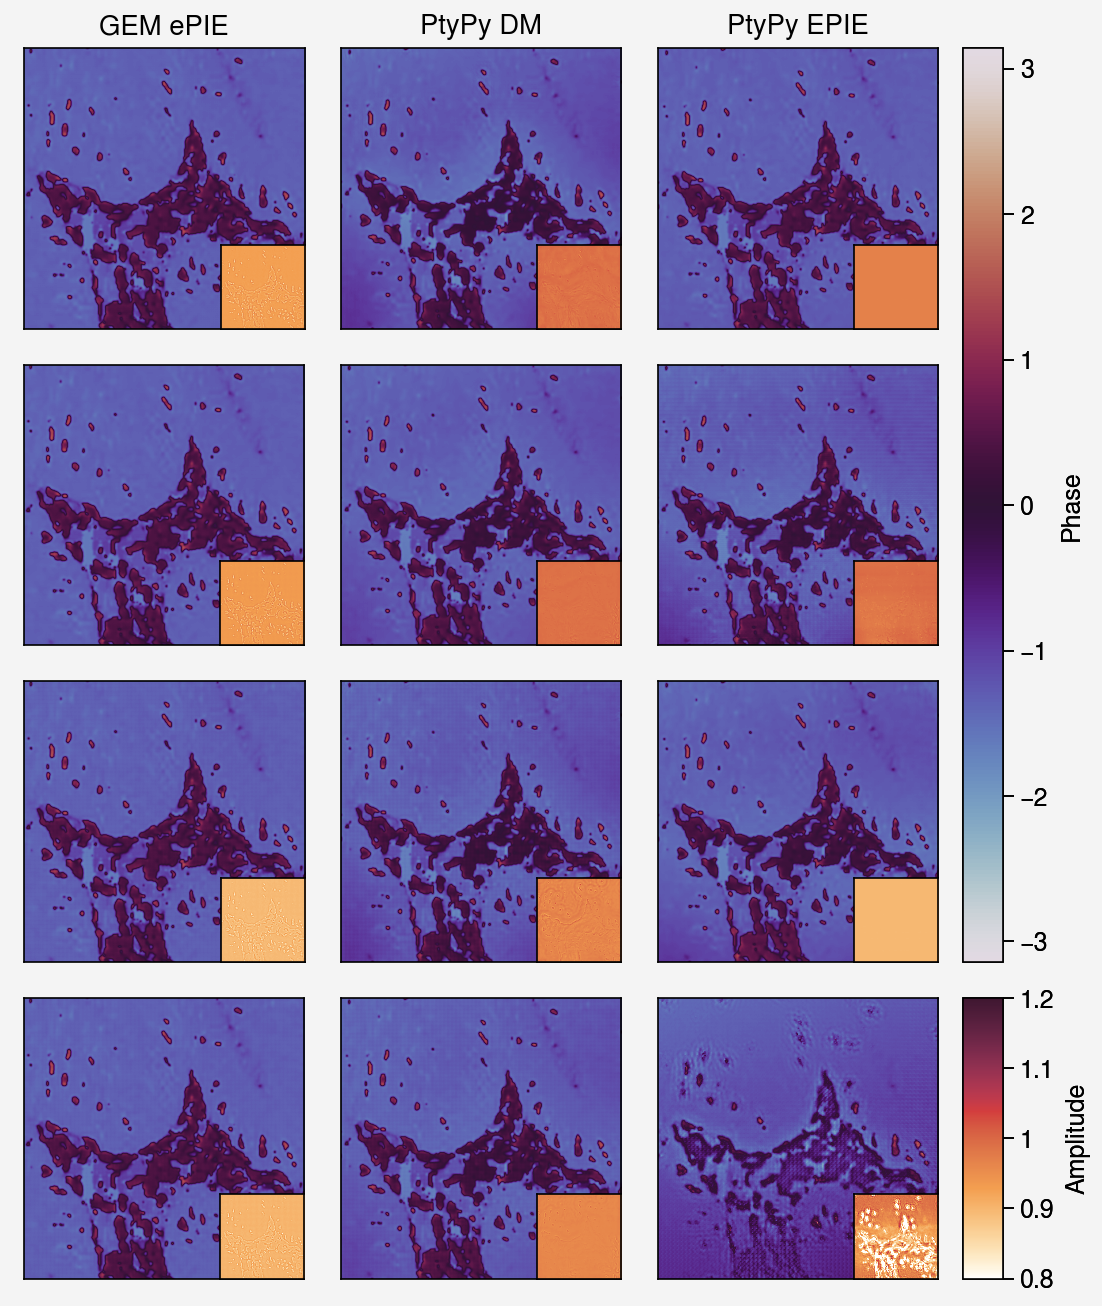

In [41]:
fig, axs = pplt.subplots(
    nrows=4, ncols=3, figwidth="14cm", sharex=False,
    xticks=[], yticks=[])

counter = 0
for ax, amp in zip(list(axs), product(['InitDefocus', 'NoInitDefocus'], [1, 2], ['GEM ePIE', 'PtyPy DM', 'PtyPy EPIE'])):
    m = ax.imshow(phs['{} {} {}'.format(*reversed(amp))], cyclic=True, vmin=-np.pi, vmax=np.pi, cmap="twilight")
    if counter <= 2:
        ax.format(title=amp[-1])
    counter += 1

    inset = ax.inset([0.7, 0, 0.3, 0.3], zoom=False)
    n = inset.imshow(amps['{} {} {}'.format(*reversed(amp))], vmin=0.8, vmax=1.2)
    inset.format(xticks=[], yticks=[])
fig.colorbar(m, loc='r', label='Phase', rows=[1, 3])
fig.colorbar(n, loc='r', label='Amplitude', rows=4)

fig.savefig('AmplitudeAnalysis.pdf')

Probe

In [53]:
from pathlib import Path
import glob

phs = dict()
intys = dict()
for i in glob.glob('*/final_probe*.npy'):
    if i.count('padding_1'):
        padding = 1
    else:
        padding = 2

    if i.count('ePIE'):
        alg = 'GEM ePIE'
    elif i.count('PtyPy_EPIE'):
        alg = 'PtyPy EPIE'
    else:
        alg = 'PtyPy DM'

    if i.count('NoInitDefocus'):
        init = 'NoInitDefocus'
    else:
        init = 'InitDefocus'

    phs['{} {} {}'.format(alg, padding, init)] = np.angle(np.load(i))
    intys['{} {} {}'.format(alg, padding, init)] = np.abs(np.load(i))**2
    intys['{} {} {}'.format(alg, padding, init)] /= np.max(intys['{} {} {}'.format(alg, padding, init)])


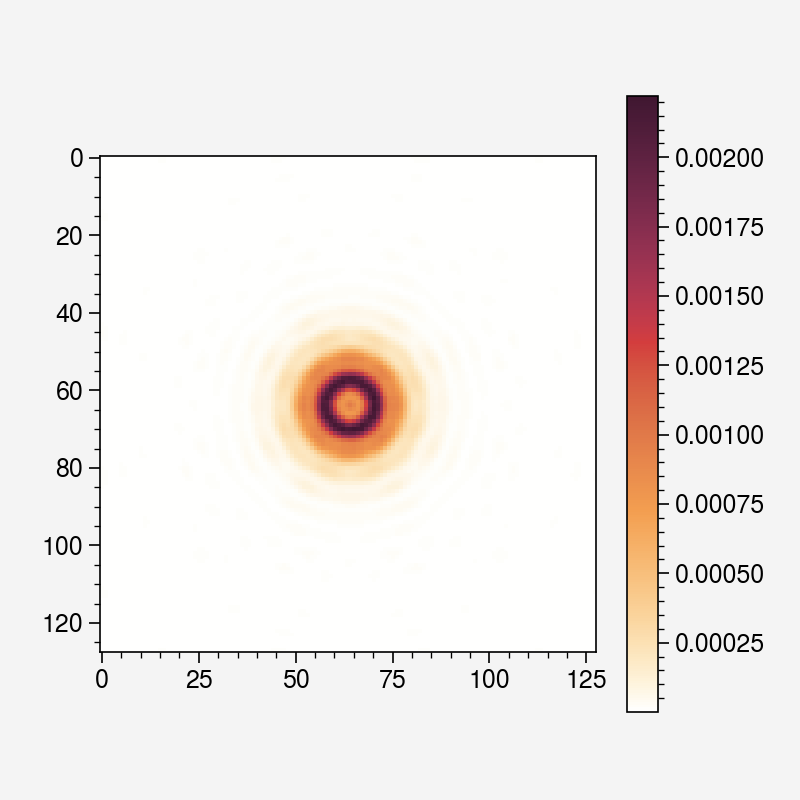

In [52]:
plt.imshow(list(intys.values())[0])
plt.colorbar()

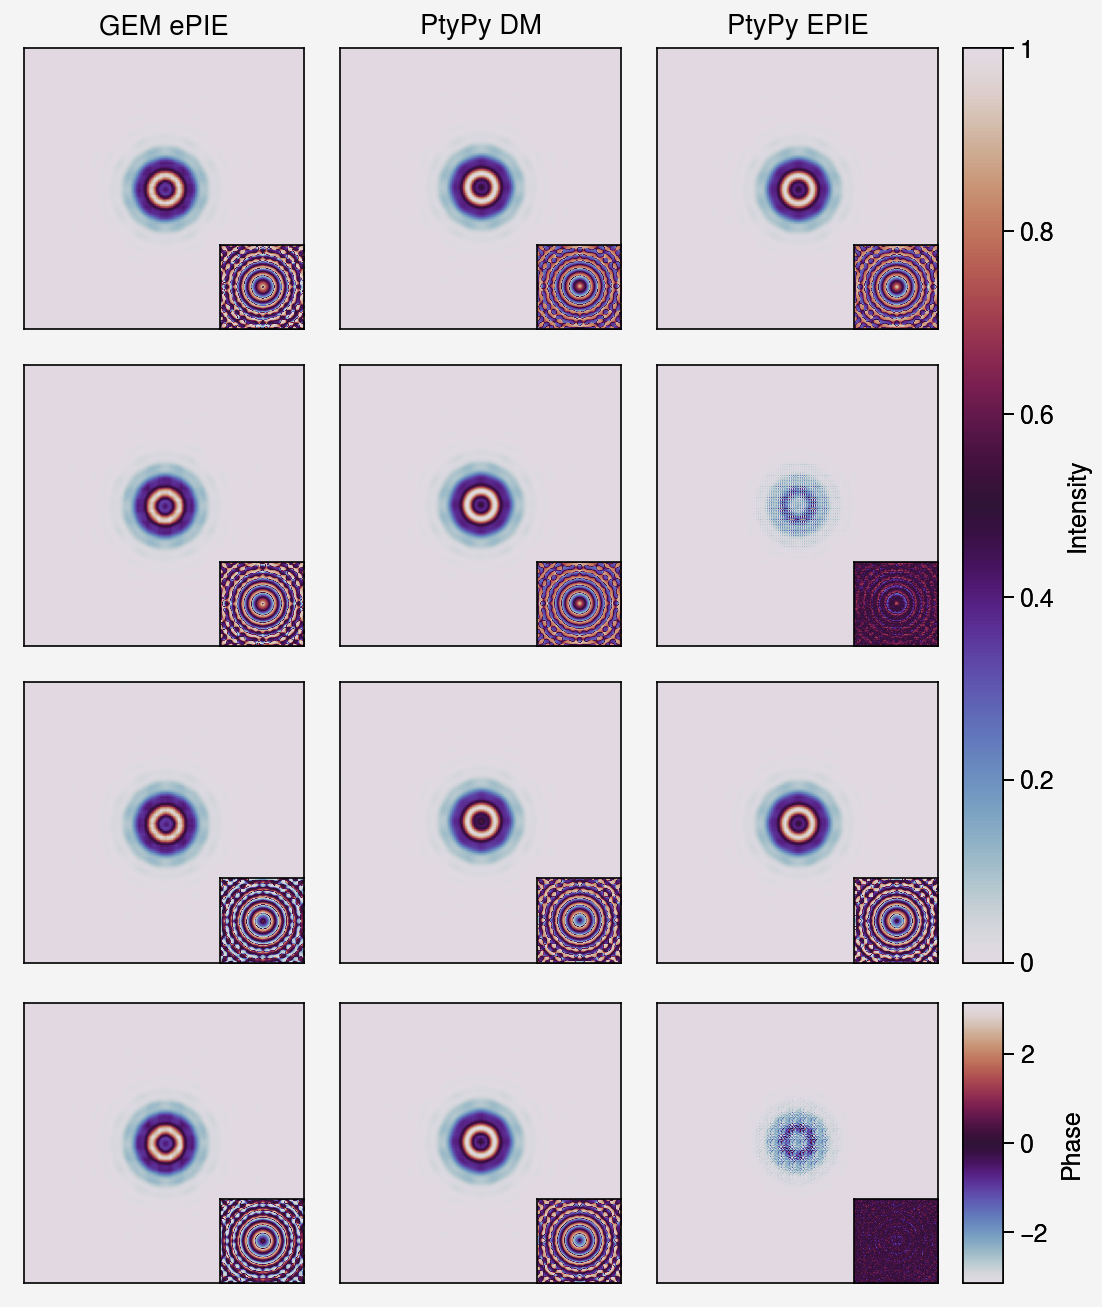

In [54]:
fig, axs = pplt.subplots(
    nrows=4, ncols=3, figwidth="14cm", sharex=False,
    xticks=[], yticks=[])

counter = 0
for ax, inty in zip(list(axs), product(['InitDefocus', 'NoInitDefocus'], [1, 2], ['GEM ePIE', 'PtyPy DM', 'PtyPy EPIE'])):
    m = ax.imshow(intys['{} {} {}'.format(*reversed(inty))], cyclic=True, vmin=0, vmax=1)
    if counter <= 2:
        ax.format(title=inty[-1])
    counter += 1

    inset = ax.inset([0.7, 0, 0.3, 0.3], zoom=False)
    n = inset.imshow(phs['{} {} {}'.format(*reversed(inty))], vmin=-np.pi, vmax=np.pi, cmap="twilight")
    inset.format(xticks=[], yticks=[])
fig.colorbar(m, loc='r', label='Intensity', rows=[1, 3])
fig.colorbar(n, loc='r', label='Phase', rows=4)

fig.savefig('ProbeAnalysis.pdf')